In [3]:
import requests
import json
from bs4 import BeautifulSoup
from IPython.display import Image
from IPython.core.display import HTML 
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline

### 爬取弹幕的流程

1. 取Season id

2. 取episode id， cid

3. 取弹幕

**api = 接口**

#### 1. 取Season ID

In [4]:
Image(filename = "./seasonID.png")

FileNotFoundError: [Errno 2] No such file or directory: './seasonID.png'

In [ ]:
1689,5451,2967,5559,6018

In [ ]:
url = 'https://bangumi.bilibili.com/anime/2967/play#76675'

In [ ]:
text = requests.get(url).text

In [ ]:
soup = BeautifulSoup(text,'lxml')
print(soup.prettify())

#### 2. 取episod id, 取cid

In [ ]:

PATH = "./取cid.png"
Image(filename = PATH, width=700, height=700)

#### 3. 爬弹幕


In [6]:
url_fanwai = 'https://bangumi.bilibili.com/web_api/get_ep_list?season_id=5451'
import requests
text = requests.get(url_fanwai).text


In [7]:
text

'{"code":0,"message":"success","result":[{"avid":5410828,"cid":8795676,"episode_id":95199,"index":"1"},{"avid":5627892,"cid":9140377,"episode_id":95200,"index":"2"},{"avid":5865507,"cid":9525850,"episode_id":95201,"index":"3"},{"avid":6096282,"cid":9897031,"episode_id":95680,"index":"4"},{"avid":6281991,"cid":10206971,"episode_id":95913,"index":"5"}]}'

In [8]:
import json
text_js = json.loads(text)
text_js

{'code': 0,
 'message': 'success',
 'result': [{'avid': 5410828,
   'cid': 8795676,
   'episode_id': 95199,
   'index': '1'},
  {'avid': 5627892, 'cid': 9140377, 'episode_id': 95200, 'index': '2'},
  {'avid': 5865507, 'cid': 9525850, 'episode_id': 95201, 'index': '3'},
  {'avid': 6096282, 'cid': 9897031, 'episode_id': 95680, 'index': '4'},
  {'avid': 6281991, 'cid': 10206971, 'episode_id': 95913, 'index': '5'}]}

In [9]:
text_js['result']

[{'avid': 5410828, 'cid': 8795676, 'episode_id': 95199, 'index': '1'},
 {'avid': 5627892, 'cid': 9140377, 'episode_id': 95200, 'index': '2'},
 {'avid': 5865507, 'cid': 9525850, 'episode_id': 95201, 'index': '3'},
 {'avid': 6096282, 'cid': 9897031, 'episode_id': 95680, 'index': '4'},
 {'avid': 6281991, 'cid': 10206971, 'episode_id': 95913, 'index': '5'}]

In [10]:
text_js['result'][0]

{'avid': 5410828, 'cid': 8795676, 'episode_id': 95199, 'index': '1'}

In [11]:
text_js['result'][0]['cid']

8795676

In [ ]:
Image(filename ='danmu_api.png')

In [ ]:
第一个参数是弹幕出现的时间 以秒数为单位。
第二个参数是弹幕的模式1..3 滚动弹幕 4底端弹幕 5顶端弹幕 6.逆向弹幕 7精准定位 8高级弹幕
第三个参数是字号， 12非常小,16特小,18小,25中,36大,45很大,64特别大
第四个参数是字体的颜色 以HTML颜色的十进制为准
第五个参数是Unix格式的时间戳。基准时间为 1970-1-1 08:00:00
第六个参数是弹幕池 0普通池 1字幕池 2特殊池 【目前特殊池为高级弹幕专用】
第七个参数是发送者的ID，用于“屏蔽此弹幕的发送者”功能
第八个参数是弹幕在弹幕数据库中rowID 用于“历史弹幕”功能。

In [ ]:
<d p="304.97900,1,25,15138834,1508663765,0,d24ecf2b,3912870146">不要哭，不然眼泪会被冻住的.....</d>
<d p="390.29400,1,25,16777215,1508663908,0,751e6653,3912876862">背后即是祖国，我们无路可退</d>
<d p="5.06000,1,25,16777215,1508664522,0,198e806e,3912902369">第一第一万年第一</d>
<d p="174.24200,1,25,16777215,1508669634,0,887407a6,3913112815">勿谓言之不预也</d>
<d p="18.30700,1,25,16711680,1508669810,0,7df9b0ba,3913120335">中国红</d>

In [ ]:
#有问题！最多只能显示1000条，需要爬去所有历史弹幕，怎么办？
#history_url_timestamp_list = "https://comment.bilibili.com/rolldate,cid"
#all_history_url = "https://comment.bilibili.com/dmroll,timestamp,cid"

### 取历史弹幕

In [12]:
cid = '8795676'
history_url_timestamp_list = "https://comment.bilibili.com/rolldate"
all_history_url = "https://comment.bilibili.com/dmroll"

timestamp_list_url=history_url_timestamp_list+","+cid
print(timestamp_list_url)
timestamps = requests.get(timestamp_list_url).text
all_timestamps=json.loads(timestamps)
all_timestamps

https://comment.bilibili.com/rolldate,8795676


[{'new': '3856', 'timestamp': '1469030400'},
 {'new': '1010', 'timestamp': '1469116800'},
 {'new': '406', 'timestamp': '1469203200'},
 {'new': '236', 'timestamp': '1469289600'},
 {'new': '144', 'timestamp': '1469376000'},
 {'new': '104', 'timestamp': '1469462400'},
 {'new': '150', 'timestamp': '1469548800'},
 {'new': '266', 'timestamp': '1469635200'},
 {'new': '355', 'timestamp': '1469721600'},
 {'new': '479', 'timestamp': '1469808000'},
 {'new': '557', 'timestamp': '1469894400'},
 {'new': '639', 'timestamp': '1469980800'},
 {'new': '718', 'timestamp': '1470067200'},
 {'new': '752', 'timestamp': '1470153600'},
 {'new': '908', 'timestamp': '1470240000'},
 {'new': '1051', 'timestamp': '1470326400'},
 {'new': '1157', 'timestamp': '1470412800'},
 {'new': '1218', 'timestamp': '1470499200'},
 {'new': '1276', 'timestamp': '1470585600'},
 {'new': '1333', 'timestamp': '1470672000'},
 {'new': '1401', 'timestamp': '1470758400'},
 {'new': '1461', 'timestamp': '1470844800'},
 {'new': '1514', 'times

In [13]:
all_timestamps[0]['timestamp']

'1469030400'

In [14]:
danmu_url="https://comment.bilibili.com/dmroll,{},{}".format(all_timestamps[0]['timestamp'],cid)

In [15]:
from bs4 import BeautifulSoup
danmu = requests.get(danmu_url).text
soup = BeautifulSoup(danmu,'lxml')
print(soup)

<?xml version="1.0" encoding="UTF-8"?><html><body><i><chatserver>chat.bilibili.com</chatserver><chatid>8795676</chatid><mission>0</mission><maxlimit>1500</maxlimit><max_count>1500</max_count><d p="21.312,1,25,16777215,1469001996,0,574f2030,2117203867">前两万</d>
<d p="8.019,1,25,16777215,1469002032,0,c4dd6b09,2117206565">前两万</d>
<d p="627.302,1,25,16777215,1469002052,0,6eae8d28,2117208105">minewar</d>
<d p="463.362,1,25,16777215,1469002051,0,d1404b05,2117208123">这季没换ED！</d>
<d p="544.128,1,25,16777215,1469002056,0,fb7b5285,2117208411">火华社长</d>
<d p="184.14,1,25,16777215,1469002056,0,3f572aba,2117208437">这个falg立得好</d>
<d p="35.9,1,25,15138834,1469002066,0,c9fdb69a,2117209237">长津湖？</d>
<d p="64.751,1,25,16777215,1469002068,0,4c5f78d9,2117209383">百战天虫既视感</d>
<d p="215.232,1,25,16777215,1469002101,0,4bcfe55b,2117212287">伤员好可爱啊！</d>
<d p="198.089,1,25,15138834,1469002170,0,fa6e6407,2117217377">可惜还是打不过skt</d>
<d p="393.479,5,25,16711680,1469002193,0,6ef369d2,2117219351">背后即是祖国，我们无路可退</d>
<d p="

In [16]:
cid = '8795676'
history_url_timestamp_list = "https://comment.bilibili.com/rolldate"
all_history_url = "https://comment.bilibili.com/dmroll"

timestamp_list_url=history_url_timestamp_list+","+cid
print(timestamp_list_url)
timestamps = requests.get(timestamp_list_url).text

all_timestamps=json.loads(timestamps)
rows = []

for list in range(len(all_timestamps)):
    danmu_url = "https://comment.bilibili.com/dmroll,{},{}".format(all_timestamps[list]['timestamp'],cid)
    danmu = requests.get(danmu_url).text
    soup = BeautifulSoup(danmu,'lxml')
    if list%100==0:
        print(list)
    for i in soup.select('d'):
        i_text = i.get_text() # 进度条神马情况
        i_p = i['p'].split(',') # 539.89， 1， 25，...  # 8个元素
        i_p.append(i_text) # 9个元素
        rows.append(i_p)
        
records = pd.DataFrame(rows,columns = ['time','format','font','color','data_unix','danmuchi','ID','rowID','danmu'])

https://comment.bilibili.com/rolldate,8795676
0


KeyboardInterrupt: 

In [22]:
url_fanwai = 'https://bangumi.bilibili.com/web_api/get_ep_list?season_id=5451'
text = requests.get(url_fanwai).text
text_json = json.loads(text)
episode_id_list = text_json['result']

In [26]:
episode_id_list[0]['cid']

8795676

#### 采集番外篇所有集的弹幕

In [23]:

history_url_timestamp_list = "https://comment.bilibili.com/rolldate"
all_history_url = "https://comment.bilibili.com/dmroll"

for j, episode in enumerate(episode_id_list):
    cid = str(episode['cid'])
    timestamp_list_url=history_url_timestamp_list+","+cid
    print(timestamp_list_url)
    timestamps = requests.get(timestamp_list_url).text

    all_timestamps=json.loads(timestamps)
    rows = []

    for list in range(len(all_timestamps)):
        danmu_url = "https://comment.bilibili.com/dmroll,{},{}".format(all_timestamps[list]['timestamp'],cid)
        danmu = requests.get(danmu_url).text
        soup = BeautifulSoup(danmu,'lxml')
        if list%100==0:
            print(list)
        for i in soup.select('d'):
            i_text = i.get_text() # 进度条神马情况
            if not isinstance(i_text,str):
                i_text = ' '
            i_p = i['p'].split(',') # 539.89， 1， 25，...  # 8个元素
            i_p.append(i_text) # 9个元素
            rows.append(i_p)
        
    records = pd.DataFrame(rows,columns = ['time','format','font','color','data_unix','danmuchi','ID','rowID','danmu'])
    filename = '番外篇第{}集.csv'.format((j+1))
    records.to_csv(filename)

[{'avid': 5410828, 'cid': 8795676, 'episode_id': 95199, 'index': '1'},
 {'avid': 5627892, 'cid': 9140377, 'episode_id': 95200, 'index': '2'},
 {'avid': 5865507, 'cid': 9525850, 'episode_id': 95201, 'index': '3'},
 {'avid': 6096282, 'cid': 9897031, 'episode_id': 95680, 'index': '4'},
 {'avid': 6281991, 'cid': 10206971, 'episode_id': 95913, 'index': '5'}]

### Sentimental Analysis

In [76]:
url = 'https://comment.bilibili.com/8795676.xml'
text = requests.get(url).text
soup = BeautifulSoup(text,'lxml')
useful_cont = soup.find_all('d')

In [77]:
useful_cont

[<d p="390.29400,1,25,16777215,1508663908,0,751e6653,3912876862">背后即是祖国，我们无路可退</d>,
 <d p="5.06000,1,25,16777215,1508664522,0,198e806e,3912902369">第一第一万年第一</d>,
 <d p="174.24200,1,25,16777215,1508669634,0,887407a6,3913112815">勿谓言之不预也</d>,
 <d p="18.30700,1,25,16711680,1508669810,0,7df9b0ba,3913120335">中国红</d>,
 <d p="187.83900,1,25,15138834,1508671627,0,5022f93e,3913199472">你们对力量一无所知</d>,
 <d p="389.30100,1,25,15138834,1508671657,0,5022f93e,3913208903">背后即是祖国，我们无路可退</d>,
 <d p="357.80200,1,25,15138834,1508673440,0,740a17fb,3913278906">历史番</d>,
 <d p="555.66300,1,25,16777215,1508674663,0,30689680,3913334633">天佑中华！！！</d>,
 <d p="591.53500,1,25,16777215,1508677498,0,453edf22,3913467143">先说一下看电视剧并不能学习历史，反而可能会被带偏。</d>,
 <d p="483.90200,1,25,16777215,1508679389,0,488c24e3,3913562900">不是心塞，是心寒</d>,
 <d p="48.77900,1,25,15138834,1508679786,0,e2290cb6,3913584404">中国红</d>,
 <d p="115.54100,1,25,16777215,1508680926,0,dea9b6aa,3913646277">年糕a</d>,
 <d p="398.46400,1,25,15138834,1508681330,0,dea9b6

In [78]:
rows = []

for i in soup.select('d'):
    i_text = i.get_text() # 进度条神马情况
    if not isinstance(i_text,str):
        i_text = ' '
    i_p = i['p'].split(',') # 539.89， 1， 25，...  # 8个元素
    i_p.append(i_text) # 9个元素
    rows.append(i_p)
    
records = pd.DataFrame(rows,columns = ['time','format','font','color','data_unix','danmuchi','ID','rowID','danmu'])
filename = '番外篇第{}集_current.csv'.format(1)
records.to_csv(filename)

In [5]:
records

time format font     color   data_unix danmuchi        ID  \
0     390.29400      1   25  16777215  1508663908        0  751e6653   
1       5.06000      1   25  16777215  1508664522        0  198e806e   
2     174.24200      1   25  16777215  1508669634        0  887407a6   
3      18.30700      1   25  16711680  1508669810        0  7df9b0ba   
4     187.83900      1   25  15138834  1508671627        0  5022f93e   
5     389.30100      1   25  15138834  1508671657        0  5022f93e   
6     357.80200      1   25  15138834  1508673440        0  740a17fb   
7     555.66300      1   25  16777215  1508674663        0  30689680   
8     591.53500      1   25  16777215  1508677498        0  453edf22   
9     483.90200      1   25  16777215  1508679389        0  488c24e3   
10     48.77900      1   25  15138834  1508679786        0  e2290cb6   
11    115.54100      1   25  16777215  1508680926        0  dea9b6aa   
12    398.46400      1   25  15138834  1508681330        0  dea9b6aa   
13    385.17300      1   25  16777215  1508682351        0  9cce3a9a   
14    395.34200      1   25  15138834  1508683501        0  931c70bc   
15    287.48000      1   25  16777215  1508687295        0  763ba34e   
16    419.07300      1   25   9487136  1508696380        0  81fd6391   
17     50.33900      1   25  15138834  1508698184        0  3fa77d88   
18    191.53600      1   25  16777215  1508716135        0  5b68579c   
19    193.52000      1   25  16777215  1508716140        0  5b68579c   
20    391.39500      1   25  15138834  1508716344        0  5b68579c   
21     20.57900      1   25  15138834  1508721887        0  999a0106   
22    197.17900      1   25  15138834  1508721858        0  999a0106   
23    407.15600      1   25  15138834  1508733199        0  3fa77d88   
24    217.34400      1   25  16777215  1508733869        0   cf2e3d6   
25    392.12500      1   25  15138834  1508740624        0   c50a8b1   
26    402.19600      1   25  15138834  1508750870        0   d94b984   
27    218.45300      1   25  16777215  1508751324        0  4c8bbf76   
28    324.52100      1   25     38979  1508756207        0   a8e4ef3   
29    391.75000      1   25  15138834  1508766766        0  b2d3fe0d   
...         ...    ...  ...       ...         ...      ...       ...   
1470  433.07700      4   25  15138834  1511675441        0  3df0e702   
1471  434.26100      4   25  15138834  1511675462        0  3df0e702   
1472  435.56100      4   25  15138834  1511675201        0  3df0e702   
1473  436.74500      4   25  15138834  1511675472        0  3df0e702   
1474  438.04600      4   25  15138834  1511675476        0  3df0e702   
1475  210.82000      1   25  16777215  1511676643        0  243f6066   
1476  392.99000      1   25  15138834  1511677126        0  195e68f2   
1477  205.47500      1   25  16711680  1511679476        0  dc24ed46   
1478   43.96100      1   25  15138834  1511682934        0  c6977395   
1479  390.54400      5   25  15138834  1511683298        0  c6977395   
1480  480.34400      4   18  15138834  1511683435        0  c6977395   
1481  546.16000      1   25  16777215  1511685349        0  85ae595a   
1482   24.93900      1   18  15138834  1511686084        0  f8b03934   
1483  209.40600      1   18  15138834  1511686252        0  f8b03934   
1484  394.77300      1   25  13369344  1511687011        0   b9fa002   
1485  476.09600      1   25  15138834  1511688402        0  cc4bc290   
1486  525.09800      1   25  15138834  1511688770        0  cc4bc290   
1487  391.69700      1   25  16777215  1511690681        0  107344fb   
1488  395.84800      1   25  15138834  1511691990        0  cbec0eea   
1489  391.97600      1   25  15138834  1511693756        0  757a869c   
1490  393.37600      1   25  15138834  1511693692        0  757a869c   
1491   40.37600      1   25  15138834  1511694117        0  fe9d84f5   
1492  382.06200      5   25  16711680  1511698466        0   7d646a7   
1493  435.97900      4   25  16711680  1511698591  

### 1. 弹幕的密度
### 2. 弹幕分词
#### 去除stopwords
### 3. 弹幕情感

In [7]:
# 1. 密度
time = records['time']



0       390.29400
1         5.06000
2       174.24200
3        18.30700
4       187.83900
5       389.30100
6       357.80200
7       555.66300
8       591.53500
9       483.90200
10       48.77900
11      115.54100
12      398.46400
13      385.17300
14      395.34200
15      287.48000
16      419.07300
17       50.33900
18      191.53600
19      193.52000
20      391.39500
21       20.57900
22      197.17900
23      407.15600
24      217.34400
25      392.12500
26      402.19600
27      218.45300
28      324.52100
29      391.75000
          ...    
1470    433.07700
1471    434.26100
1472    435.56100
1473    436.74500
1474    438.04600
1475    210.82000
1476    392.99000
1477    205.47500
1478     43.96100
1479    390.54400
1480    480.34400
1481    546.16000
1482     24.93900
1483    209.40600
1484    394.77300
1485    476.09600
1486    525.09800
1487    391.69700
1488    395.84800
1489    391.97600
1490    393.37600
1491     40.37600
1492    382.06200
1493    435.97900
1494    47

In [14]:
type(time)

pandas.core.series.Series

In [15]:
time_float = []
for i in time:
    time_float.append(float(i))

In [16]:
time_float

[390.294,
 5.06,
 174.242,
 18.307,
 187.839,
 389.301,
 357.802,
 555.663,
 591.535,
 483.902,
 48.779,
 115.541,
 398.464,
 385.173,
 395.342,
 287.48,
 419.073,
 50.339,
 191.536,
 193.52,
 391.395,
 20.579,
 197.179,
 407.156,
 217.344,
 392.125,
 402.196,
 218.453,
 324.521,
 391.75,
 589.865,
 65.686,
 69.285,
 172.684,
 194.441,
 390.158,
 402.024,
 167.119,
 61.22,
 391.383,
 169.406,
 171.64,
 181.062,
 48.257,
 347.436,
 126.636,
 209.373,
 178.26,
 66.79,
 393.034,
 390.923,
 19.259,
 287.299,
 51.711,
 23.12,
 175.354,
 385.44,
 397.142,
 52.259,
 178.019,
 391.342,
 55.843,
 200.277,
 462.208,
 391.737,
 390.495,
 394.249,
 400.116,
 405.535,
 412.873,
 76.475,
 172.533,
 371.764,
 392.496,
 423.073,
 372.342,
 151.978,
 164.187,
 90.827,
 390.575,
 6.283,
 53.141,
 176.76,
 389.903,
 170.43,
 189.268,
 369.409,
 373.91,
 378.945,
 391.862,
 396.382,
 397.522,
 406.202,
 409.262,
 413.322,
 413.322,
 175.0,
 67.499,
 174.499,
 394.877,
 390.342,
 390.342,
 396.841,
 181.55

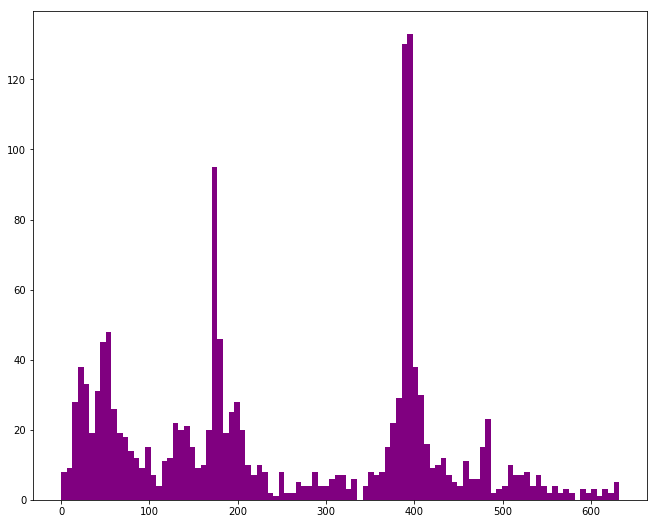

In [22]:
plt.figure(figsize = [11,9])
n, bins, patches = plt.hist(time_float, 100, facecolor='purple')
plt.show()

In [79]:
# 分词  结巴分词

In [ ]:
!pip install jieba

In [80]:
import jieba

In [29]:
fenci = jieba.cut("我在北京上大学，我上的是比清华好的北京大学",cut_all=True)
print("/ ".join(fenci))

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/0h/prhr7whx3c90l4_3m16_9sgh0000gn/T/jieba.cache
Loading model cost 1.006 seconds.
Prefix dict has been built succesfully.


我/ 在/ 北京/ 上/ 大学/ / / 我/ 上/ 的/ 是/ 比/ 清华/ 好/ 的/ 北京/ 北京大学/ 大学


In [30]:
fenci = jieba.cut("我在北京读大学，我读的是比清华好的北京大学",cut_all=False)
print("/ ".join(fenci))

我/ 在/ 北京/ 上/ 大学/ ，/ 我/ 上/ 的/ 是/ 比/ 清华/ 好/ 的/ 北京大学


In [81]:
fenci = jieba.cut("我爱北京天安门，五环比六环少一环，学好python就不是低端劳动力了，呜呜",cut_all=False)
print("/ ".join(fenci))

我/ 爱/ 北京/ 天安门/ ，/ 五环/ 比/ 六环/ 少一环/ ，/ 学好/ python/ 就/ 不是/ 低端/ 劳动力/ 了/ ，/ 呜呜


In [32]:
jieba.suggest_freq("我读的", tune=True)

1

In [33]:
fenci = jieba.cut("我在北京读大学，我读的是比清华好的北京大学",cut_all=False)
print("/ ".join(fenci))

我/ 在/ 北京/ 读/ 大学/ ，/ 我读的/ 是/ 比/ 清华/ 好/ 的/ 北京大学


In [ ]:
fenci = jieba.cut("我爱北京天安门，五环比六环多一环，学好python就不是低端劳动力了，呜呜",cut_all=False)
print("/ ".join(fenci))

In [36]:
jieba.suggest_freq(("比","六环"), tune=True)

0

In [37]:
fenci = jieba.cut("我爱北京天安门，五环比六环多一环，学好python就不是低端劳动力了，呜呜",cut_all=False)
print("/ ".join(fenci))

我/ 爱/ 北京/ 天安门/ ，/ 五环/ 比/ 六/ 环/ 多/ 一环/ ，/ 学好/ python/ 就/ 不是/ 低端/ 劳动力/ 了/ ，/ 呜呜


In [38]:
jieba.suggest_freq("六环", tune=True)
fenci = jieba.cut("我爱北京天安门，五环比六环多一环，学好python就不是低端劳动力了，呜呜",cut_all=False)
print("/ ".join(fenci))

我/ 爱/ 北京/ 天安门/ ，/ 五环/ 比/ 六环/ 多一环/ ，/ 学好/ python/ 就/ 不是/ 低端/ 劳动力/ 了/ ，/ 呜呜


In [83]:
fenci = jieba.cut("我不去上幼儿园，没意思，吃不饱还要被打针，结巴分词的效果还不错哟，周杰伦都要喜欢了",cut_all=False)
print("/ ".join(fenci))

我/ 不/ 去/ 上/ 幼儿园/ ，/ 没意思/ ，/ 吃不饱/ 还要/ 被/ 打针/ ，/ 结巴/ 分词/ 的/ 效果/ 还/ 不错/ 哟/ ，/ 周杰伦/ 都/ 要/ 喜欢/ 了


In [84]:
jieba.suggest_freq("结巴分词", tune=True)


1

In [85]:
fenci = jieba.cut("我不去上幼儿园，没意思，吃不饱还要被打针，结巴分词的效果还不错哟，周杰伦都要喜欢了",cut_all=False)
print("/ ".join(fenci))

我/ 不/ 去/ 上/ 幼儿园/ ，/ 没意思/ ，/ 吃不饱/ 还要/ 被/ 打针/ ，/ 结巴分词/ 的/ 效果/ 还/ 不错/ 哟/ ，/ 周杰伦/ 都/ 要/ 喜欢/ 了


In [24]:
comments = " ".join(records['danmu'])

In [25]:
comments

'背后即是祖国，我们无路可退 第一第一万年第一 勿谓言之不预也 中国红 你们对力量一无所知 背后即是祖国，我们无路可退 历史番 天佑中华！！！ 先说一下看电视剧并不能学习历史，反而可能会被带偏。 不是心塞，是心寒 中国红 年糕a 背后即是祖国，我们已无路可退 背后即是祖国，我们无路可退 背后即是祖国，我们无路可退 某人的儿子？ 莫斯科保卫战的台词，后边就是莫斯科后边就是斯大林 中国红 惊喜 意外 背后即是祖国，我们无路可退 奇迹色 习习习 背后就是祖国！我们无路可退！ 二班在！ 背后即是祖国，我们无路可退 背后即是祖国，我等无路可退 又看哭了 绿字 背后即是祖国，我们无路可退 建党伟业? 中国红 中国红 你们对力量一无所知 没想到吧 背后即是祖国 我们无路可退！！！！！ 背后即是祖国  我们无路可退！！！！ 人口差距？他跟我们种花家说人口。。。 中国红！ 背后即是祖国，我们无路可退！ 黄旭东:北韩优势很大！北韩a了上去！北韩打出了GG！让我们恭喜中国！ 你们对力量一无所知 你们对力量一无所知 要了 那个时候能有饼干吃就不错了，很多时候都是一把炒面一把雪啊。 麦克阿瑟：圣诞攻势 本次是入朝的第一次战斗 你们对力量一无所知 红 背后既是祖国我们无路可退 来自地狱的号声 如果奇迹有颜色，那一定是中国红 二战老兵名不虚传 中国红 : 你对于力量一无所知 背后即是祖国，我们无路可退！ 背后即是祖国 我们无路可退 中国红 你们对力量一无所知 背后即是祖国，我们无路可退！ 红起来 那一代英雄真的是抛头颅洒热血 壮哉我彭大将军！ 背后既是祖国，我们无路可退 背后即是祖国，我们无路可退 背后即是祖国，我们无路可退 背后即是祖国，我们无路可退 背后即是祖国，我们无路可退 背后即是祖国，我们无路可退 中国红 你们对力量一无所知 背后是祖国我们无路可退 背后是祖国，我们无路可退 没想法?等他有想法就晚了美国就是个贪得无厌的国家 背后即是祖国，我们无路可退 回你mmp，， 回家回你mmp 前面三门峡的别跑      等等老乡 背后即使祖国  我们无路可退 特来找虐 试色 你们对力量一无所知！ 背后即是祖国，我们无路可退！！ 你们对力量一无所知 你爸爸永远是你爸爸 背后即是祖国，我们无路可退 背后即是祖国，我们无路可退 背后即是祖国，我们无路可退 背后即是祖国，我们无路可退 背后即是祖国，我们

In [39]:
fenci_all = list(jieba.cut(comments,cut_all=False))


In [41]:
fenci_all

10201

In [ ]:
nltk

In [42]:
!pip install snownlp

    100% |████████████████████████████████| 37.6MB 17kB/s eta 0:00:011    89% |████████████████████████████▌   | 33.6MB 914kB/s eta 0:00:05
  Running setup.py bdist_wheel for snownlp ... - \ | / done
  Stored in directory: /Users/crazychen/Library/Caches/pip/wheels/1f/da/14/720f3df19515fffb40cc67c56e1ae8dced5c9fea7fe4796dd9
Successfully built snownlp


In [89]:
s1 = SnowNLP("杀人放火")
s1.sentiments

0.574549474228723

In [92]:
s1 = SnowNLP("")
s1.sentiments

0.5

In [44]:
from snownlp import SnowNLP

In [61]:
records['Senti'] = pd.Series()
for i,comment in enumerate(records['danmu']):
    records.loc[i,'Senti'] = SnowNLP(comment).sentiments

In [62]:
records

time format font     color   data_unix danmuchi        ID  \
0     390.29400      1   25  16777215  1508663908        0  751e6653   
1       5.06000      1   25  16777215  1508664522        0  198e806e   
2     174.24200      1   25  16777215  1508669634        0  887407a6   
3      18.30700      1   25  16711680  1508669810        0  7df9b0ba   
4     187.83900      1   25  15138834  1508671627        0  5022f93e   
5     389.30100      1   25  15138834  1508671657        0  5022f93e   
6     357.80200      1   25  15138834  1508673440        0  740a17fb   
7     555.66300      1   25  16777215  1508674663        0  30689680   
8     591.53500      1   25  16777215  1508677498        0  453edf22   
9     483.90200      1   25  16777215  1508679389        0  488c24e3   
10     48.77900      1   25  15138834  1508679786        0  e2290cb6   
11    115.54100      1   25  16777215  1508680926        0  dea9b6aa   
12    398.46400      1   25  15138834  1508681330        0  dea9b6aa   
13    385.17300      1   25  16777215  1508682351        0  9cce3a9a   
14    395.34200      1   25  15138834  1508683501        0  931c70bc   
15    287.48000      1   25  16777215  1508687295        0  763ba34e   
16    419.07300      1   25   9487136  1508696380        0  81fd6391   
17     50.33900      1   25  15138834  1508698184        0  3fa77d88   
18    191.53600      1   25  16777215  1508716135        0  5b68579c   
19    193.52000      1   25  16777215  1508716140        0  5b68579c   
20    391.39500      1   25  15138834  1508716344        0  5b68579c   
21     20.57900      1   25  15138834  1508721887        0  999a0106   
22    197.17900      1   25  15138834  1508721858        0  999a0106   
23    407.15600      1   25  15138834  1508733199        0  3fa77d88   
24    217.34400      1   25  16777215  1508733869        0   cf2e3d6   
25    392.12500      1   25  15138834  1508740624        0   c50a8b1   
26    402.19600      1   25  15138834  1508750870        0   d94b984   
27    218.45300      1   25  16777215  1508751324        0  4c8bbf76   
28    324.52100      1   25     38979  1508756207        0   a8e4ef3   
29    391.75000      1   25  15138834  1508766766        0  b2d3fe0d   
...         ...    ...  ...       ...         ...      ...       ...   
1470  433.07700      4   25  15138834  1511675441        0  3df0e702   
1471  434.26100      4   25  15138834  1511675462        0  3df0e702   
1472  435.56100      4   25  15138834  1511675201        0  3df0e702   
1473  436.74500      4   25  15138834  1511675472        0  3df0e702   
1474  438.04600      4   25  15138834  1511675476        0  3df0e702   
1475  210.82000      1   25  16777215  1511676643        0  243f6066   
1476  392.99000      1   25  15138834  1511677126        0  195e68f2   
1477  205.47500      1   25  16711680  1511679476        0  dc24ed46   
1478   43.96100      1   25  15138834  1511682934        0  c6977395   
1479  390.54400      5   25  15138834  1511683298        0  c6977395   
1480  480.34400      4   18  15138834  1511683435        0  c6977395   
1481  546.16000      1   25  16777215  1511685349        0  85ae595a   
1482   24.93900      1   18  15138834  1511686084        0  f8b03934   
1483  209.40600      1   18  15138834  1511686252        0  f8b03934   
1484  394.77300      1   25  13369344  1511687011        0   b9fa002   
1485  476.09600      1   25  15138834  1511688402        0  cc4bc290   
1486  525.09800      1   25  15138834  1511688770        0  cc4bc290   
1487  391.69700      1   25  16777215  1511690681        0  107344fb   
1488  395.84800      1   25  15138834  1511691990        0  cbec0eea   
1489  391.97600      1   25  15138834  1511693756        0  757a869c   
1490  393.37600      1   25  15138834  1511693692        0  757a869c   
1491   40.37600      1   25  15138834  1511694117        0  fe9d84f5   
1492  382.06200      5   25  16711680  1511698466        0   7d646a7   
1493  435.97900      4   25  16711680  1511698591  

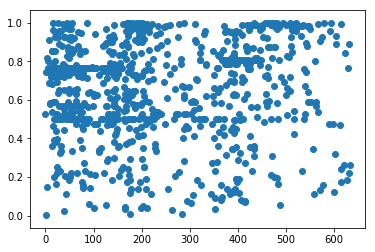

In [75]:
plt.scatter(time_float,records['Senti'])
#(records['time'],records['Senti'],c='purple',s=0.2)